## Build a Comment Toxicity Model

#### Steps:
1. Import the .csv dataset : containing a series of comment.
   - Convert inputs to tokens using Text vectorization function.
2. Labels : Multi-Binary : Allows us to evaluate how toxic a particular comment is
3. Pre-processed text is passed through Deep Neural Network: 
   - It uses LSTM layers
   - Convert it into h5 format: Allow us to save our deep NN to our hard drive.
4. Integrate our Deep NN into a Gradio App (Allows us to build user interfaces for Deep NN model)
   - Allows us to test our model in realtime

### 0. Install Dependencies and Bring in Data

In [1]:
import os
import pandas as pd # Helps in reading tabular data
import tensorflow as tf # Deep learning framework
import numpy as np 

In [4]:
os.path.join('jigsaw-toxic-comment-classification','train.csv')

'jigsaw-toxic-comment-classification/train.csv'

In [5]:
df = pd.read_csv(
    os.path.join('jigsaw-toxic-comment-classification','train.csv')
    )

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [8]:
df.iloc[0]

id                                                0000997932d777bf
comment_text     Explanation\nWhy the edits made under my usern...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 0, dtype: object

In [17]:
df.iloc[5500]['comment_text']

'Comment - I would say this Essjay guy is over 30-years old not 24-years old !'

In [18]:
df[df.columns[2:]].iloc[5500]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5500, dtype: int64

### 1. Preprocess Data
1. Tokenizing the Data
2. Creating taining, testing nad validation partitions

In [19]:
# Getting text vectorization layer
from tensorflow.keras.layers import TextVectorization

In [20]:
TextVectorization??

In [21]:
# Splitting our Data
X = df['comment_text']
y = df[df.columns[2:]].values

In [23]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [24]:
# Returns everything after column 2
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [25]:
# Converting into numpy array
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [26]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [27]:
y # Labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [31]:
MAX_FEATURES = 200000 # number of words in the vocab

In [32]:
# Initialize our text vectorization layer
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               # Specifying the maximum length of our sentence
                              output_sequence_length = 1800,
                               # Map every single word to an integer value
                              output_mode = 'int')

In [34]:
type(X)

pandas.core.series.Series

In [35]:
type(X.values)

numpy.ndarray

In [33]:
# Teach our vectorizer our vocabulary
vectorizer.adapt(X.values) # adapt: Learn all words that are inside our vocabulary
# X.values convert comments from Series into numpy array

In [38]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [41]:
# Convert into sequence of numbers
# Remove punctuations
vectorizer("Hey Champs! How's life?")[:4] 

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([  425, 31344,  5382,   306])>

In [42]:
vectorized_text = vectorizer(X.values)

In [43]:
# Numaric Representation of all our sentences
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [44]:
len(X)

159571

In [45]:
len(vectorized_text)

159571

In [46]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [47]:
# create a tensorflow data pipeline
# MCSHBAP M:Map C:Cache SH: Shuffle : BA:Batch P: Prefetch from tensor_slices, list_dir
# Passing through input features: vectorized_text, target_variable: y
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
# How large our buffer size needs to be
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
# Helps prevent bottlenecks
dataset = dataset.prefetch(8)

In [49]:
# Fetch one batch
batch_X,batch_Y = dataset.as_numpy_iterator().next()

In [50]:
batch_X.shape

(16, 1800)

In [51]:
batch_Y.shape

(16, 6)

In [54]:
len(dataset)*16 # 9974 batches*16

159584

In [52]:
# Creating training, validation and text partitions
train = dataset.take(int(len(dataset)*.7)) # Take 70% of the length of the dataset
# Skip the 1st 70% of the dataset and then take 20% of remaining
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [55]:
len(test)

997

In [56]:
train_generator = train.as_numpy_iterator()

In [57]:
# Step through our batches
train_generator.next()

(array([[  55, 1806,    8, ...,    0,    0,    0],
        [ 727,  727,   20, ...,    0,    0,    0],
        [  14,   59,   15, ...,    0,    0,    0],
        ...,
        [1757,    7,   51, ...,    0,    0,    0],
        [  73,  447,    9, ...,    0,    0,    0],
        [  49,   10,    9, ...,    0,    0,    0]]),
 array([[1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

### 2. Create Sequential Model

In [62]:
from tensorflow.keras.models import Sequential
# Bidirectional layer : Allow us to pass the features or values from LSTM outputs across the board as we're passing through sequences
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional, Dense, Embedding

In [64]:
# Instantiate the sequential API
model = Sequential()
# Create the embedding layer
# Specify the no. of embedding layers : MAX_FEATURES + 1, each embedding would have 32 values(no. of features) 
model.add(Embedding(MAX_FEATURES+1,32))
# GPU acceleartion required for an LSTM layer needs to be tanh
# Bidirectional : Allows to pass info backwards and forwards across LSTM layer

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32,activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

# Final layer
# Maps to the no. of different outputs that we got inside our neural networks
# Sigmoid : Transform output into values btw 0 & 1
# Running 6 diff binary classifiers at a time
model.add(Dense(6,activation='sigmoid'))

In [65]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                      

In [67]:
history = model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 3115s 446ms/step - loss: 0.0631 - val_loss: 0.0465


In [69]:
history.history

{'loss': [0.06310390681028366], 'val_loss': [0.04648328945040703]}

In [68]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

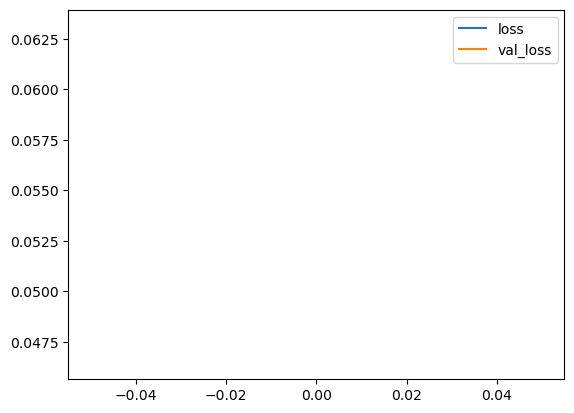

In [70]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### 3. Make Predictions

In [77]:
input_text = vectorizer("I am not happy:/But I can't hurt you.")

In [79]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [80]:
batch = test.as_numpy_iterator().next()

In [81]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [82]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [84]:
# Sequence of integers
# Multiple comments passed at a time
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 88ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [89]:
# Model expects the shape of input to be none * no. of values in sequence * Length of our embedding
#res = model.predict(np.expand_dims(input_text,0))

res = model.predict(batch_X)
# threshold value = 0.5

1/1 [==============================] - 0s 83ms/step


In [92]:
res.flatten().shape # Convert into one big array

(96,)

### 4. Evaluate Model

In [86]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [87]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [93]:
# Loop through every single batch inside our data pipleine
for batch in test.as_numpy_iterator():
    # Unpacking the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    # Updating each matrix : precision, recall, CategoricalAccuracy
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 67ms/step


In [97]:
print(f'Precision: {pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.8107650876045227,Recall:0.6588720679283142,Accuracy:0.49047142267227173


### 5. Test and Gradio

In [ ]:
!pip install gradio jinja2

In [100]:
import gradio as gr

In [101]:
model.save('toxicity.h5')

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
model = tf.keras.models.load_model('toxicity.h5')

In [103]:
input_str = vectorizer("Hey! I hate you for being you.")

In [105]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 604ms/step


In [108]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [106]:
res

array([[0.8061542 , 0.02952968, 0.4753967 , 0.03208819, 0.4833497 ,
        0.06099473]], dtype=float32)

In [112]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [114]:
# Pass a comment through a prediction pipeline
def score_comment(comment):
    # Pass comment through our vectorizer : Convert text into sequence of numbers
    vectorized_comment = vectorizer([comment]) 
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col,results[0][idx]>0.5)
        # Print out the column corresponding to the comment
    return text

In [119]:
interface = gr.Interface(fn=score_comment,
                        inputs = gr.Textbox(lines=2,placeholder='Comment to score'),
                        outputs ='text')

In [120]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2023/12/16 00:59:59 [W] [service.go:132] login to server failed: dial tcp 44.237.78.176:7000: connect: network is unreachable


1/1 [==============================] - 0s 51ms/step
